## Método para exibir o algoritmo de classificação com melhor acurácia.

Analise será exibida através de gráfico de BOXPLOT para comparação

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
NB: 0.755178 (0.042766)
KNN: 0.726555 (0.061821)
CART: 0.695267 (0.060929)
SVM: 0.651025 (0.072141)


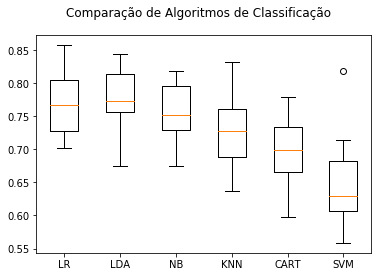

In [8]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Preparando os modelo
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
    cv_results = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

By: Arnaldo Cavalcanti | Ref. datascienceacademy (https://www.datascienceacademy.com.br)